# Line Cooling
The main difference between UCLPDR and UCLCHEM is line cooling. This notebook compares level populations and opacities written out by the code to help identify differences. Outputs are standard for UCLPDR so can just be loaded, UCLCHEM outputs are generated using single_wrap_test.py to run the model.

I'm running a UCLCHEM with fixed heating rates and temperature that match the UCLPDR model. It's labelled Benchmarking/fixed_heating but is really just a copy of the 10_1e3 model created so I can run grids without overwriting. I'm writing tests to Benchmarking/fixed_heating and grids to Benchmarking/fixed_heating/Equilibrium

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pdr_path="../fixed_heating/Equilibrium/"
chem_path="../fixed_heating/"

In [128]:
pdr_pops=pd.read_csv(pdr_path+"fixed_heating.pop.out",delimiter=" ")
pdr_pops=pdr_pops.iloc[0].transpose().rename(lambda x: x[2:].split(",")[0])
pdr_pops.head()

rticle    1.000000e+00
H         9.997330e+02
H         3.626960e-67
C+        8.419800e-02
C+        1.576100e-02
Name: 0, dtype: float64

In [129]:
chem_pops=pd.read_csv(chem_path+"1.pop",delimiter=":")
chem_pops=chem_pops.transpose().rename(lambda x: x[2:].split(",")[0])
chem_pops.head()

,0
DEL,1.000000e+00
H,9.997300e+02
H,3.626100e-67
C+,8.419800e-02
C+,1.576100e-02


In [130]:
plot_df.head()

,Mol,0_x,0_y
1,H,9.997330e+02,9.997300e+02
2,H,3.626960e-67,3.626100e-67
3,C+,8.419800e-02,7.702000e-02
4,C+,1.576100e-02,2.293900e-02
5,O,2.999020e-01,2.998200e-01


[None, (1e-35, 10.0), None, (1e-35, 10.0)]

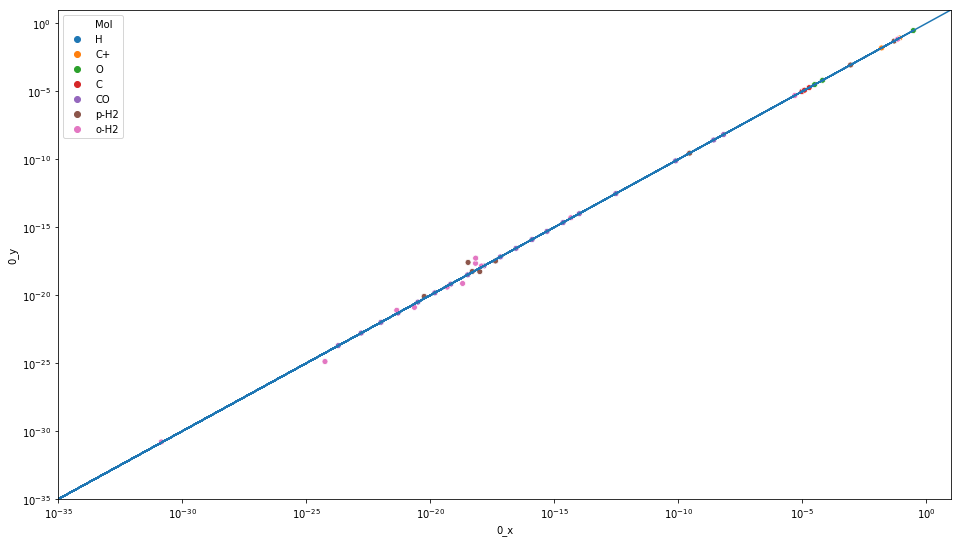

In [131]:
fig,ax=plt.subplots(figsize=(16,9))

plot_df=pdr_pops.reset_index().merge(chem_pops.reset_index(drop=True),left_index=True,right_index=True)
plot_df=plot_df.rename({"index":"Mol"},axis=1).drop(0).dropna()
sns.scatterplot(data=plot_df,x="0_x",y="0_y",hue="Mol",ax=ax)
#ax.plot(pdr_pops.values[1:],chem_pops.values[1:],ls="",marker="o")
ax.plot(plot_df["0_x"],plot_df["0_x"])
ax.set(xscale="log",yscale="log",ylim=(1e-35,1e1),xlim=(1e-35,1e1))

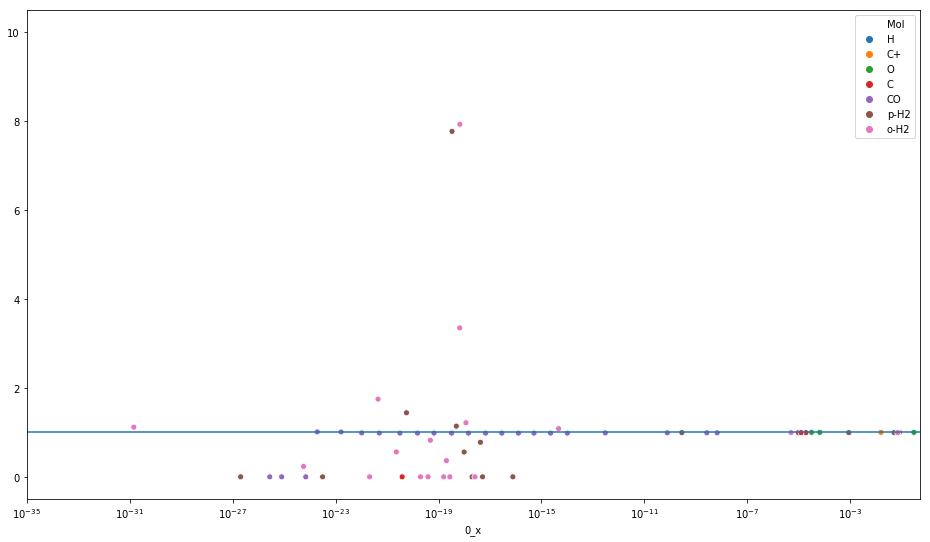

In [132]:
fig,ax=plt.subplots(figsize=(16,9))
yvals=plot_df["0_y"].div(plot_df["0_x"])
yvals=np.where(yvals>10,10,yvals)
sns.scatterplot(x=plot_df["0_x"],y=yvals,hue=plot_df["Mol"],ax=ax)
ax.set(xlim=(1e-35,.5e0),xscale='log')
ax.axhline(1.0)